In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [47]:
df = pd.read_csv(r"C:\Users\hp\Downloads\Spotify-2000.csv")

In [48]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30.0,53.0,-14.0,11.0,68.0,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79.0,50.0,-11.0,17.0,NaN,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69.0,66.0,-9.0,7.0,52.0,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96.0,43.0,-4.0,3.0,37.0,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82.0,58.0,-5.0,10.0,87.0,256,1,3,59


In [49]:
df.tail()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
1989,1990,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21.0,70.0,-12.0,11.0,72.0,128,84,7,63
1990,1991,Hound Dog,Elvis Presley,adult standards,1958,175,76.0,36.0,-8.0,76.0,95.0,136,73,6,69
1991,1992,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80.0,53.0,-9.0,31.0,NaN,162,74,7,74
1992,1993,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26.0,45.0,-13.0,7.0,60.0,324,54,4,65
1993,1994,Blueberry Hill,Fats Domino,adult standards,1959,133,50.0,49.0,-10.0,16.0,83.0,148,74,3,56


In [50]:
df.shape

(1994, 15)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Year                    1994 non-null   int64  
 5   Beats Per Minute (BPM)  1994 non-null   int64  
 6   Energy                  1979 non-null   float64
 7   Danceability            1903 non-null   float64
 8   Loudness (dB)           1934 non-null   float64
 9   Liveness                1960 non-null   float64
 10  Valence                 1909 non-null   float64
 11  Length (Duration)       1994 non-null   object 
 12  Acousticness            1994 non-null   int64  
 13  Speechiness             1994 non-null   int64  
 14  Popularity              1994 non-null   

In [52]:
df.isnull().sum()

Index                      0
Title                      0
Artist                     0
Top Genre                  0
Year                       0
Beats Per Minute (BPM)     0
Energy                    15
Danceability              91
Loudness (dB)             60
Liveness                  34
Valence                   85
Length (Duration)          0
Acousticness               0
Speechiness                0
Popularity                 0
dtype: int64

In [53]:
df.isnull().sum()*100/len(df)

Index                     0.000000
Title                     0.000000
Artist                    0.000000
Top Genre                 0.000000
Year                      0.000000
Beats Per Minute (BPM)    0.000000
Energy                    0.752257
Danceability              4.563691
Loudness (dB)             3.009027
Liveness                  1.705115
Valence                   4.262788
Length (Duration)         0.000000
Acousticness              0.000000
Speechiness               0.000000
Popularity                0.000000
dtype: float64

In [54]:
df.Energy.fillna(76.0,inplace=True)

In [55]:
df.Danceability.bfill(inplace=True)

In [56]:
df['Loudness (dB)'].fillna(-7.0,inplace=True)

In [57]:
df.Liveness.ffill(inplace=True)

In [58]:
df.Valence.fillna(30.0,inplace=True)

## k-Means clustering

In [59]:
df1 = df[["Beats Per Minute (BPM)", "Loudness (dB)", 
              "Liveness", "Valence", "Acousticness", 
              "Speechiness"]]

In [60]:
for i in df.columns:
    MinMaxScaler(i)
    
kmeans = KMeans(n_clusters=10)
cluster = kmeans.fit_predict(df1)

In [61]:
df['Music Segments'] = cluster

In [62]:
MinMaxScaler(df['Music Segments'])

MinMaxScaler(feature_range=0       8
1       7
2       0
3       0
4       4
       ..
1989    5
1990    8
1991    8
1992    8
1993    5
Name: Music Segments, Length: 1994, dtype: int32)

In [63]:
df["Music Segments"] = df["Music Segments"].map({1: "Cluster 1", 2: 
    "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 
    6: "Cluster 6", 7: "Cluster 7", 8: "Cluster 8", 
    9: "Cluster 9", 10: "Cluster 10"})

In [64]:
condition = df['Length (Duration)'] == '1,121'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

     Index                                              Title Artist  \
904    905  Close to the Edge (i. The Solid Time of Change...    Yes   

      Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  \
904  album rock  1972                      81    60.0          67.0   

     Loudness (dB)  Liveness  Valence Length (Duration)  Acousticness  \
904           -7.0      41.0     25.0             1,121            27   

     Speechiness  Popularity Music Segments  
904            6          47      Cluster 9  


In [65]:
df.drop(904,axis=0,inplace=True)

In [66]:
condition = df['Length (Duration)'] == '1,367'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

     Index                     Title     Artist   Top Genre  Year  \
951    952  Autobahn - 2009 Remaster  Kraftwerk  dance rock  1974   

     Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  \
951                      82    50.0          33.0          -16.0      13.0   

     Valence Length (Duration)  Acousticness  Speechiness  Popularity  \
951     11.0             1,367            11            4          48   

    Music Segments  
951      Cluster 9  


In [67]:
df.drop(951,axis=0,inplace=True)

In [68]:
condition = df['Length (Duration)'] == '1,292'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

      Index      Title      Artist   Top Genre  Year  Beats Per Minute (BPM)  \
1982   1983  Get Ready  Rare Earth  blues rock  1969                     127   

      Energy  Danceability  Loudness (dB)  Liveness  Valence  \
1982    87.0          41.0           -6.0      83.0     65.0   

     Length (Duration)  Acousticness  Speechiness  Popularity Music Segments  
1982             1,292             0            4          45      Cluster 2  


In [69]:
df.drop(1982,axis=0,inplace=True)

In [70]:
condition = df['Length (Duration)'] == '1,412'

# Extract rows based on the condition
result = df[condition]

# Print the result
print(result)

     Index   Title      Artist   Top Genre  Year  Beats Per Minute (BPM)  \
842    843  Echoes  Pink Floyd  album rock  1971                     134   

     Energy  Danceability  Loudness (dB)  Liveness  Valence Length (Duration)  \
842    32.0          28.0          -17.0      11.0     14.0             1,412   

     Acousticness  Speechiness  Popularity Music Segments  
842            37            4          58      Cluster 7  


In [71]:
df.drop(842,axis=0,inplace=True)

In [72]:
# Drop non-numeric columns that are not needed for clustering
numeric_data = df.drop(['Year','Index', 'Title', 'Artist', 'Top Genre', 'Music Segments'], axis=1)

In [73]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [74]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=12)
    kmeans.fit(numeric_data)
    
    wcss.append(kmeans.inertia_)

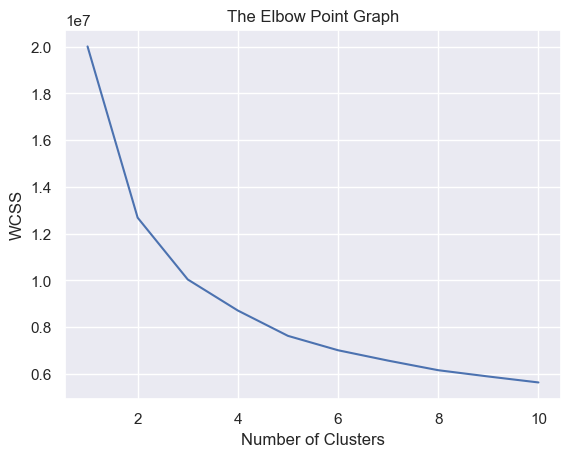

In [75]:
## plot an elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [76]:
# Define the number of clusters for K-means
num_clusters = 3  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [77]:
# Access the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_data.columns)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


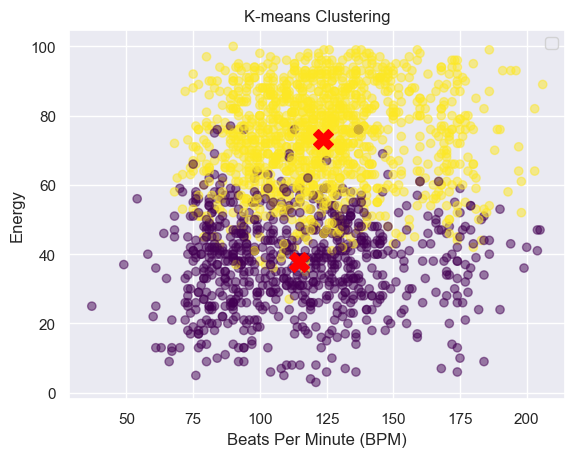

In [97]:
# Create a 2D plot for visualization (assuming only two features are used)
feature1, feature2 = 'Beats Per Minute (BPM)', 'Energy'
plt.scatter(df[feature1], df[feature2], c=df['Cluster'], cmap='viridis', alpha=0.5 )
plt.scatter(cluster_centers[feature1], cluster_centers[feature2], marker='X', s=200, c='red')
plt.title('K-means Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()

In [85]:
# Define the number of clusters for K-means
num_clusters = 2  # You can adjust this based on your needs

# Fit KMeans model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [86]:
# Access the cluster centers
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=numeric_data.columns)

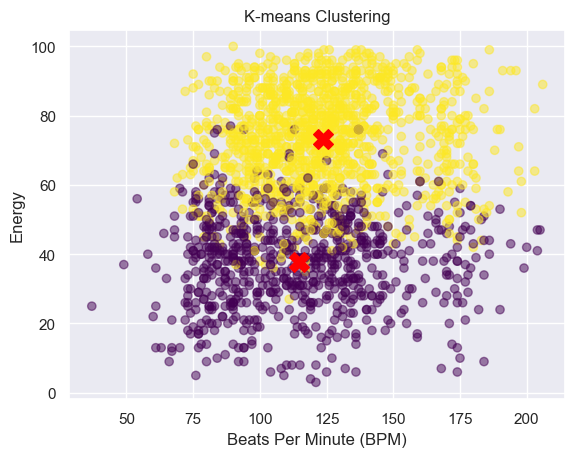

In [87]:
# Create a 2D plot for visualization (assuming only two features are used)
feature1, feature2 = 'Beats Per Minute (BPM)', 'Energy'
plt.scatter(df[feature1], df[feature2], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[feature1], cluster_centers[feature2], marker='X', s=200, c='red')
plt.title('K-means Clustering')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

 ## Principle Component Analysis (PCA)

In [35]:
# Applying PCA
pca = PCA(n_components=3)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)

In [36]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2', 'PCA3'])

In [37]:
# Concatenate the principal components DataFrame with the 'Cluster' column
pc_df = pd.concat([pc_df, df['Cluster']], axis=1)

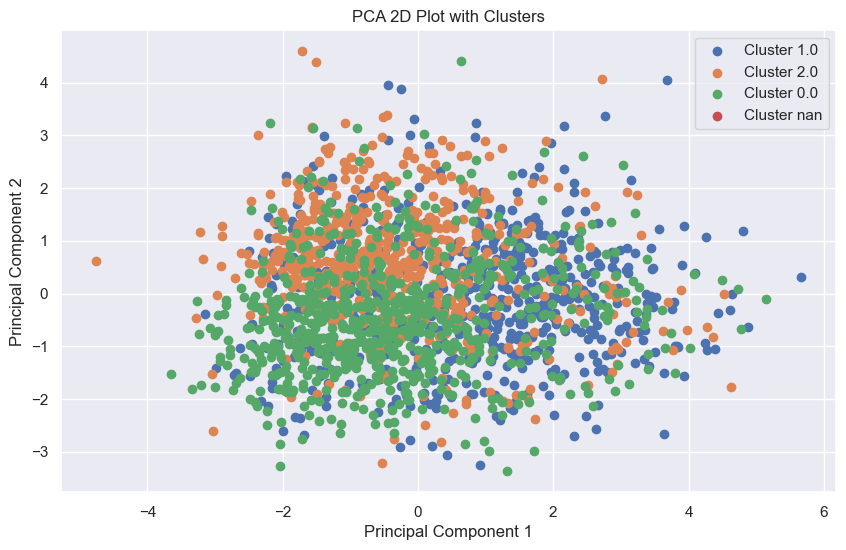

In [38]:
# Plot the 2D scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
for cluster in pc_df['Cluster'].unique():
    cluster_data = pc_df[pc_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

# Plot title and axis labels
plt.title('PCA 2D Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')plt.legend()
plt.show()

In [88]:
# Applying PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
principal_components = pca.fit_transform(scaled_data)

In [90]:
# Create a DataFrame with the principal components
pc_df = pd.DataFrame(data=principal_components, columns=['PCA1','PCA2'])

In [91]:
# Concatenate the principal components DataFrame with the 'Cluster' column
pc_df = pd.concat([pc_df, df['Cluster']], axis=1)

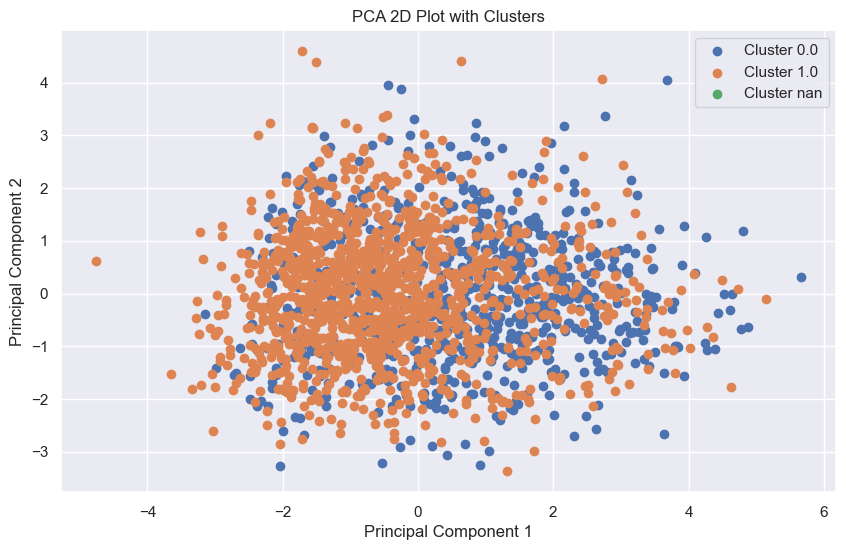

In [92]:
# Plot the 2D scatter plot with different colors for each cluster
plt.figure(figsize=(10, 6))
for cluster in pc_df['Cluster'].unique():
    cluster_data = pc_df[pc_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

# Plot title and axis labels
plt.title('PCA 2D Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## Hierarchical clustering

In [39]:
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import scale as s
from scipy.cluster.hierarchy import dendrogram,linkage

In [40]:
Z = sch.linkage(numeric_data,method='ward')

In [41]:
Z

array([[3.70000000e+02, 7.92000000e+02, 1.02469508e+01, 2.00000000e+00],
       [7.40000000e+01, 1.18500000e+03, 1.02469508e+01, 2.00000000e+00],
       [1.35000000e+02, 3.37000000e+02, 1.11355287e+01, 2.00000000e+00],
       ...,
       [3.97300000e+03, 3.97400000e+03, 1.70430622e+03, 1.16700000e+03],
       [3.97200000e+03, 3.97600000e+03, 2.11976994e+03, 1.80800000e+03],
       [3.97500000e+03, 3.97700000e+03, 3.71383628e+03, 1.99000000e+03]])

Text(0.5, 1.0, 'Hierarchical Clustering')

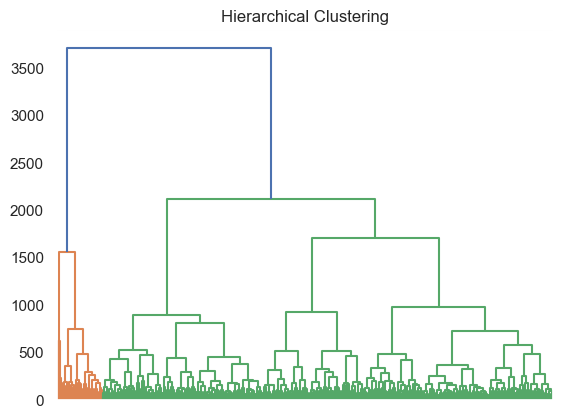

In [42]:
# Create and plot a dendrogram
den = sch.dendrogram(Z)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False) 
plt.title('Hierarchical Clustering')

In [43]:
def fd(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

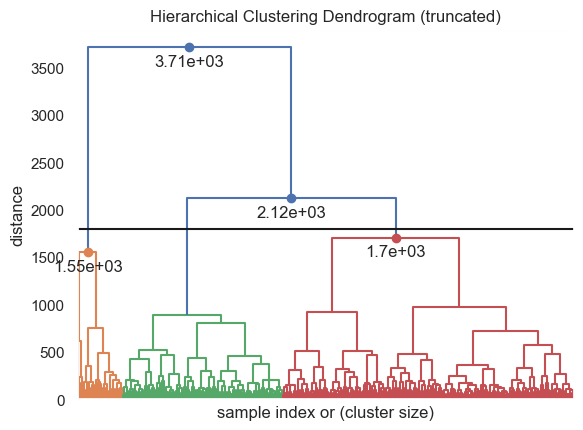

In [44]:
fd(Z,leaf_rotation=90.,show_contracted=True,annotate_above=1000,max_d=1800)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,     
    top=False,         
    labelbottom=False)